In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import random_projection
import umap# 

In [2]:

df = pd.read_csv("seeds.tsv", sep="\t", names=['Area', 'Perimeter', 'Compactness', 'Kernel length', 'Kernel width', 'Asymmetry coefficient', 'Groove length', 'Label'])

variances = df.var()
means = df.mean()

normalized = df

for column in normalized:
    normalized[column] -= means[column]
    normalized[column] /= np.sqrt(variances[column])

normalized_params = normalized.drop('Label', axis=1)
normalized_params

,Area,Perimeter,Compactness,Kernel length,Kernel width,Asymmetry coefficient,Groove length
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223
...,...,...,...,...,...,...,...
205,-0.913333,-1.040834,0.308997,-1.109397,-0.734959,-0.046025,-1.094797
206,-1.243264,-1.285864,-0.842110,-1.102626,-1.227395,0.415547,-0.824186
207,-0.566218,-0.688602,0.732199,-0.885953,-0.070436,3.069254,-0.716349
208,-1.033620,-1.033176,-0.799790,-1.023631,-1.118847,-0.067973,-0.740765


C:\Users\savin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


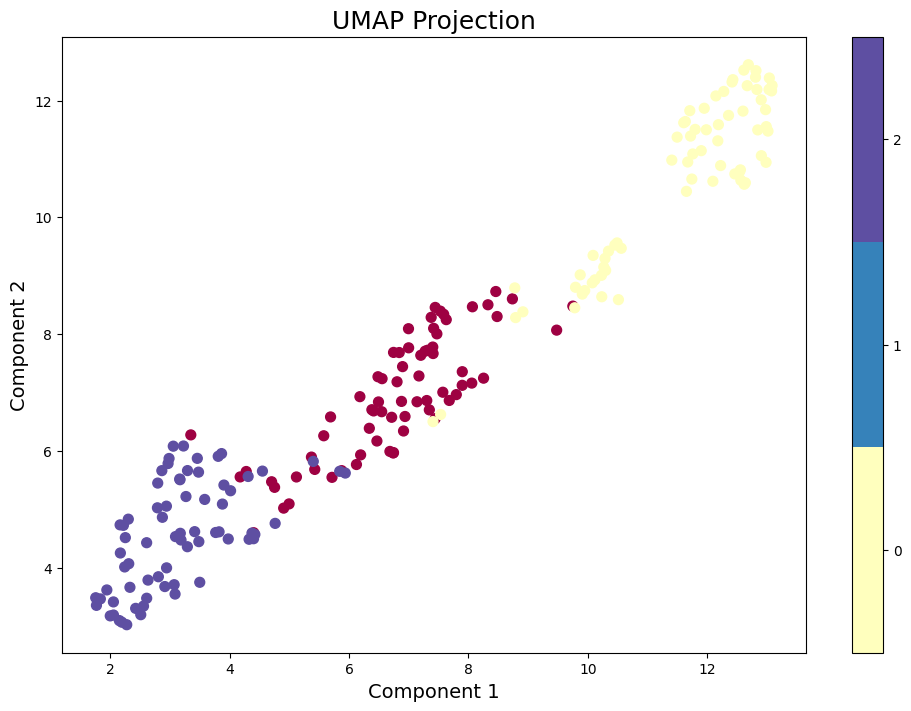

In [9]:
umap_reducer = umap.UMAP(random_state=6)
embedding = umap_reducer.fit_transform(normalized_params)
plt.figure(figsize=(12, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=normalized['Label'], cmap='Spectral', s=50)
plt.title('UMAP Projection', fontsize=18)
plt.xlabel('Component 1', fontsize=14)
plt.ylabel('Component 2', fontsize=14)
plt.colorbar(boundaries=np.arange(4)-0.5).set_ticks(np.arange(3))
plt.show()